## 1. Load the MNIST dataset from http://yann.lecun.com/exdb/mnist/. Randomly use 80% of the data for train- ing, and the remaining 20% for testing.

### Load MNIST

In [92]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Train-test split
Randomly use 80% of the data for training, and the remaining 20% for testing.

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)

## 2. Display (i) the first sample; (ii) number of training samples; and (iii) number of testing samples.

### The first sample

<IPython.core.display.Javascript object>


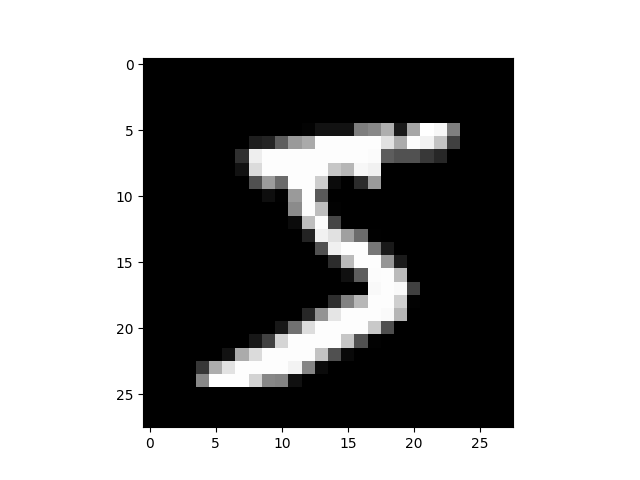

In [94]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28, 28), cmap='gray')

### Number of training & testing examples

In [95]:
print('training data:')
print(X_train.shape)
print(y_train.shape)
print()
print('testing data:')
print(X_test.shape)
print(y_test.shape)

training data:
(56000, 784)
(56000,)

testing data:
(14000, 784)
(14000,)


## 3. Design an appropriate MLP such that the training accuracy is at least 95%. You can use the MLPClassifier in https://scikit-learn.org/stable/modules/generated/sklearn.neural network.MLPClassifier.html. Show the (i) training accuracy; and (ii) testing accuracy that you obtain.


### MLP with training accuracy > 95%
My configuration:
- 1 hidden layer of 10 units, 
- learning rate as 0.1

In [96]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10,), solver='sgd',
                      verbose=False, random_state=3511,
                      learning_rate_init=.1)

In [97]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    model.fit(X_train, y_train)

#### Training & testing accuracy

In [98]:
print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))

Training set score: 0.958804
Test set score: 0.929571


## 4. Double the number of hidden units in all hidden layers, show the (i) training accuracy; and (ii) testing accuracy of this model. Similarly, try reducing the number of hidden units in all hidden layers, and again show the (i) training accuracy; and (ii) testing accuracy of this model. What observation do you have?


### Doubling the number of hidden unites in all hidden layers

In [99]:
model2 = MLPClassifier(hidden_layer_sizes=(20,), solver='sgd',
                    verbose=False, random_state=3511,
                    learning_rate_init=.1)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    model2.fit(X_train, y_train)

#### Training & testing accuracy

In [100]:
print("Training set score: %f" % model2.score(X_train, y_train))
print("Test set score: %f" % model2.score(X_test, y_test))

Training set score: 0.991607
Test set score: 0.951571


### Havling the number of hidden unites in all hidden layers

In [101]:
model3 = MLPClassifier(hidden_layer_sizes=(5,), solver='sgd',
                    verbose=False, random_state=3511,
                    learning_rate_init=.1)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    model3.fit(X_train, y_train)

#### Training & testing accuracy

In [102]:
print("Training set score: %f" % model3.score(X_train, y_train))
print("Test set score: %f" % model3.score(X_test, y_test))

Training set score: 0.874339
Test set score: 0.856571


### Observations
Let's comparing all three runs

MLP with 5 hidden units:
- train accuracy: 87.43%
- test accuracy: 85.66%

MLP with 10 hidden units:
- train accuracy: 95.88%
- test accuracy: 92.96%

MLP with 20 hidden units:
- train accuracy: 99.16%
- test accuracy: 95.16%

The result shows that both testing and training accuracy increases with the number of hidden units in each layer. 

*However, adding too many hidden units may result in overfitting where testing accuracy becomes significantly less than training accuracy.